# Samsung dataset from phisical activity


In [2]:
# Import libraries
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.metrics import silhouette_score, confusion_matrix

# Transformation
from sklearn.decomposition import PCA
from matplotlib.colors import LogNorm

# Pipeline
from sklearn.pipeline import Pipeline

# Models
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Warnings
import warnings
warnings.filterwarnings("ignore")

import sklearn
sklearn.__version__


'1.1.3'

In [3]:
# Loading data
sam_train = pd.read_csv('Data/samsung_train.txt', header=None, sep='\s+')
print(f"Training dataset contains: {sam_train.shape}")
sam_train_lab = pd.read_csv('Data/samsung_train_labels.txt', header=None)
print(f"Training dataset labels {sam_train_lab.shape}")

sam_test = pd.read_csv('Data/samsung_test.txt', header=None, sep='\s+')
print(f"Testing dataset contains: {sam_test.shape}")
sam_test_lab = pd.read_csv('Data/samsung_test_labels.txt', header=None)
print(f"Testing dataset labels {sam_test_lab.shape}")

Training dataset contains: (7352, 561)
Training dataset labels (7352, 1)
Testing dataset contains: (2947, 561)
Testing dataset labels (2947, 1)


In [4]:
# Combine training and testing set
sam = pd.concat([sam_train, sam_test])#.iloc[:,[120,451]]
sam_lab = pd.concat([sam_train_lab, sam_test_lab])
sam_lab = sam_lab #.iloc[:,0].values
print("Total dataset size", sam.shape, sam_lab.shape)


Total dataset size (10299, 561) (10299, 1)


The dataset contains 561 features and 10,299 samples. Originally, the data were separated into training and testing sets containing 7,352 and 2,947 samples, respectively. The 561 columns seem excessive, and feature reduction should be considered.

In [5]:
print(sam_lab.value_counts())
sam.describe()

6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


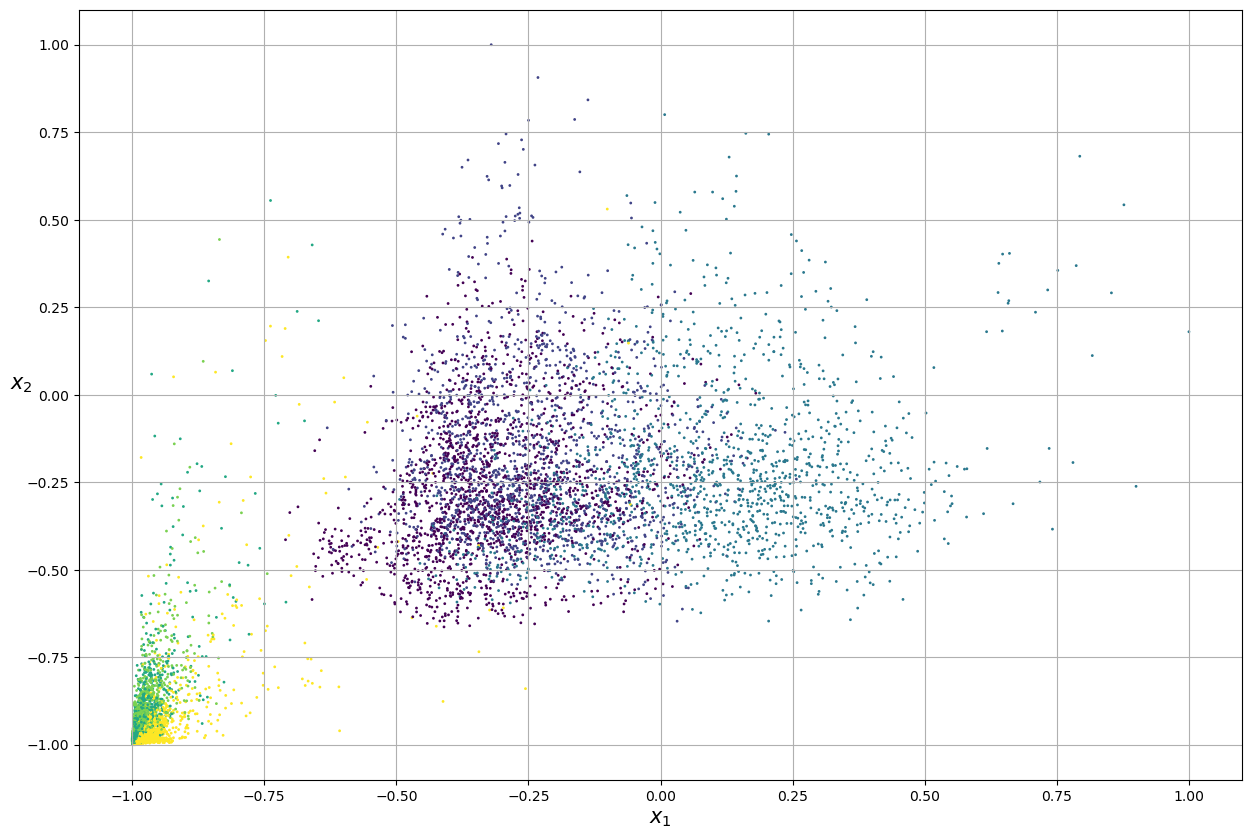

In [6]:
def plot_clusters(X, y=None):
    plt.figure(figsize=(15, 10))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=15)
    plt.ylabel("$x_2$", fontsize=15, rotation=0)
    plt.grid()

# Visualisation of randomly selected features
sam_2f = sam.iloc[:,[3,8]].to_numpy()
plot_clusters(sam_2f, sam_lab)

All features have been standardized to fall within the range of -1 to 1, but no explanations have been provided for them. The separation into training and testing sets is unnecessary, and the entire dataset will be used for further analysis. For visualization purposes, only two random features will be selected for clustering.

### Feature reduction

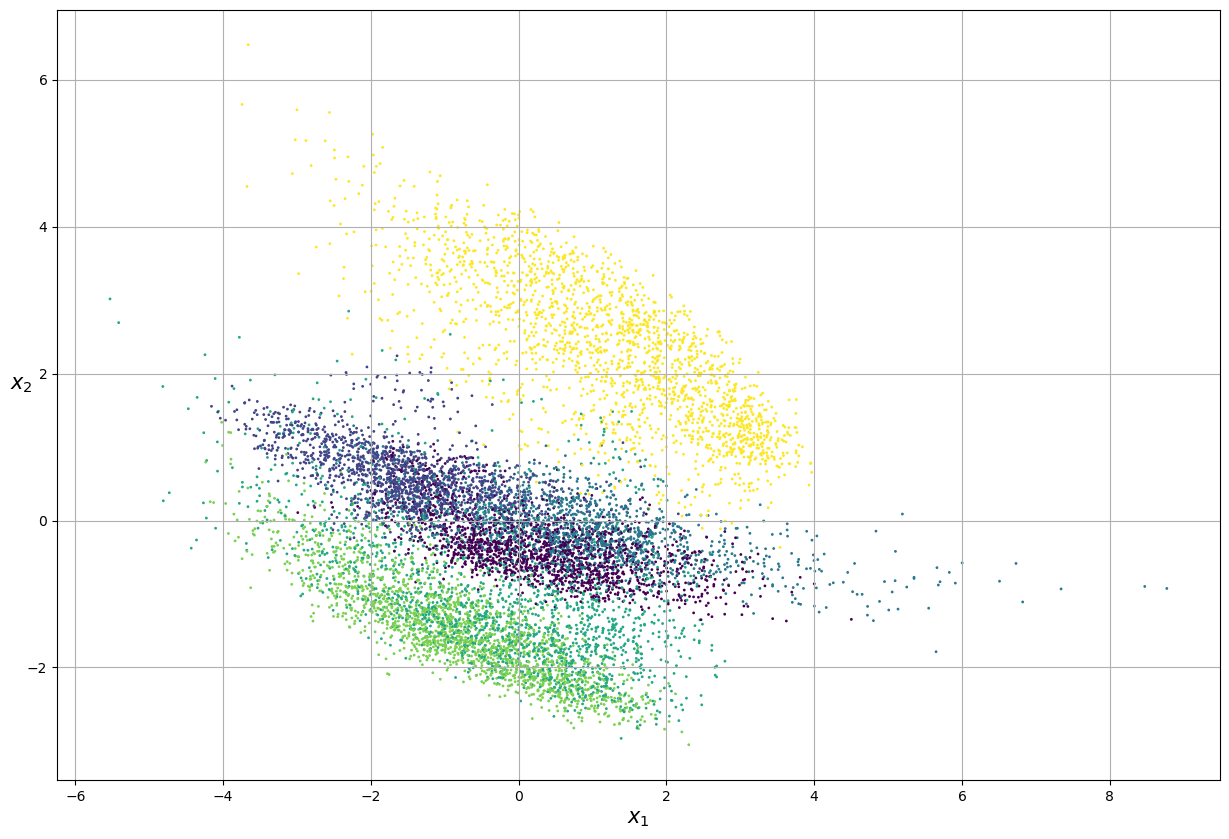

In [7]:
pca = PCA(random_state=42)
sam_pca = pca.fit_transform(sam)
sam_2f_pca = pd.DataFrame(sam_pca).iloc[:,[1,2]].to_numpy()
plot_clusters(sam_2f_pca, sam_lab)


Further analysis will be performed on the second and third PCA component. 

## KMeans Clustering


In [8]:
# Creating the model with 6 classes as shown in labels
kmeans = KMeans(random_state=42, max_iter=500, n_clusters=6)

# Fitting and predicting all data
y_pred = kmeans.fit_predict(sam_2f_pca)

# Score
kmeans_score = kmeans.score(sam_2f_pca, sam_lab)
print(f"KMeans algorithm score: ", kmeans_score)

KMeans algorithm score:  -9605.61840557666


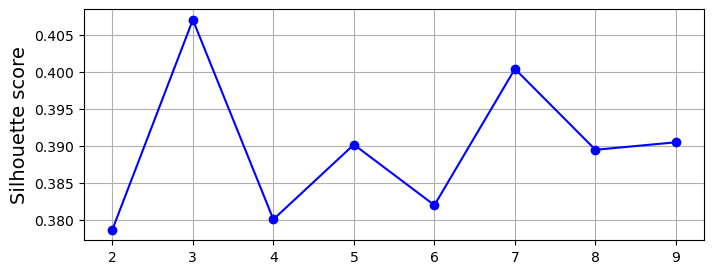

In [9]:
# Select optimal number of clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(sam_2f_pca)
                for k in range(1, 10)]

# calculate silhouette scores
silhouette_scores = [silhouette_score(sam_2f_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()


Based on the silhouette score, the optimal number of clusters is 3. However, by selecting different features or transformating them further, we could potentially achieve a clustering closer to the 6 groups that represent different physical activities.

In [10]:
# Creating the model with 3 classes 
kmeans2 = KMeans(random_state=42, max_iter=500, n_clusters=3)

# Fitting and predicting all data
y_pred2 = kmeans2.fit_predict(sam_2f_pca)

# Score
kmeans2_score = kmeans2.score(sam_2f_pca, sam_lab)
print(f"KMeans algorithm score: ", kmeans2_score)

KMeans algorithm score:  -19109.5287222782


In [11]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


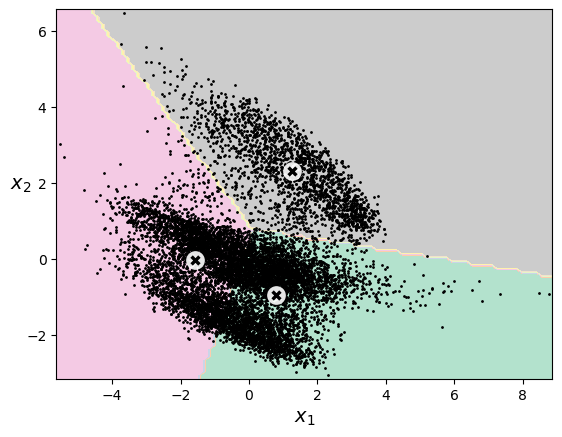

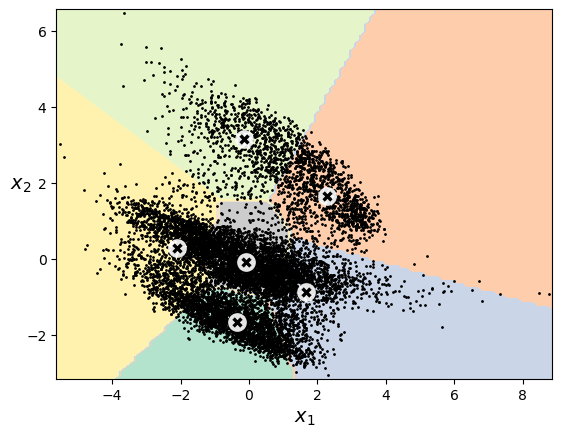

In [12]:
# Visualisation
plot_decision_boundaries(kmeans2, sam_2f_pca)
plt.show()
plot_decision_boundaries(kmeans, sam_2f_pca)
plt.show()


In [13]:
# Creating the model with 6 classes using all data
kmeans_all = KMeans(random_state=42, max_iter=500, n_clusters=6)

# Fitting and predicting all data
y_pred_all = kmeans_all.fit_predict(sam)

# Score
kmeans_all_score = kmeans_all.score(sam, sam_lab)
print(f"KMeans algorithm score: ", kmeans_all_score)

KMeans algorithm score:  -182168.6815366601


In [29]:
y_pred_all_df = pd.DataFrame(y_pred_all)
print(y_pred_all_df.value_counts()) # number of assigned samples to each class
for i in range(1,7):
    print("Correct class: ", i)
    ind = sam_lab.index[sam_lab[0] == i]
    print(y_pred_all_df.iloc[ind,:].value_counts())
y_pred_all_df = y_pred_all_df[0].map({0:2, 1:5, 2:4, 3:3, 4:1, 5:6})

2    2491
0    2072
4    1929
5    1810
1    1311
3     686
dtype: int64
Correct class:  1
4    733
0    585
3    164
2    112
1     78
5     50
dtype: int64
Correct class:  2
0    835
4    305
2    134
3    102
5     86
1     82
dtype: int64
Correct class:  3
4    599
3    370
0    179
2    122
1     76
5     60
dtype: int64
Correct class:  4
2    1008
1     369
4     181
5     121
0      52
3      46
dtype: int64
Correct class:  5
2    1039
1     519
5     121
0     100
4      87
3      40
dtype: int64
Correct class:  6
5    1321
1     201
0     140
4     126
2      80
3      76
dtype: int64


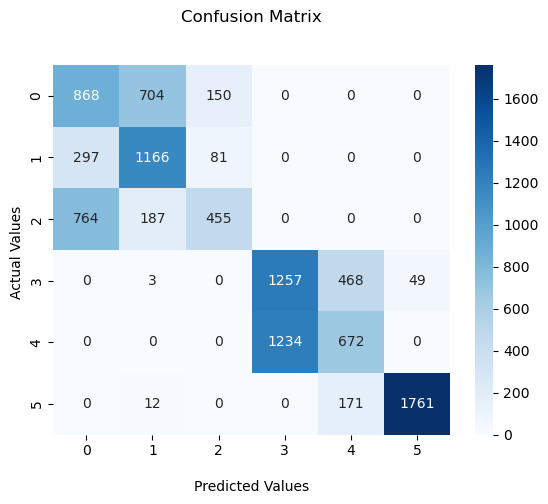

In [30]:
# Confusion matrix
plt.figure()
cm = confusion_matrix(sam_lab, y_pred_all_df)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()


The performance of the algorithm is very poor as the clusters are not distributed correctly. It is difficult to assign potential new classes to the existing ones. The activity that was clustered most accurately is 6, which represents lying down.

## DBSCAN

In [16]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [17]:
# DBSACN with epsilon equal 0.2
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(sam_2f_pca)

# drugi DBSCAN z eps = 0.08
dbscan_2 = DBSCAN(eps=0.08, min_samples=10)
dbscan_2.fit(sam_2f_pca)

DBSCAN(eps=0.08, min_samples=10)

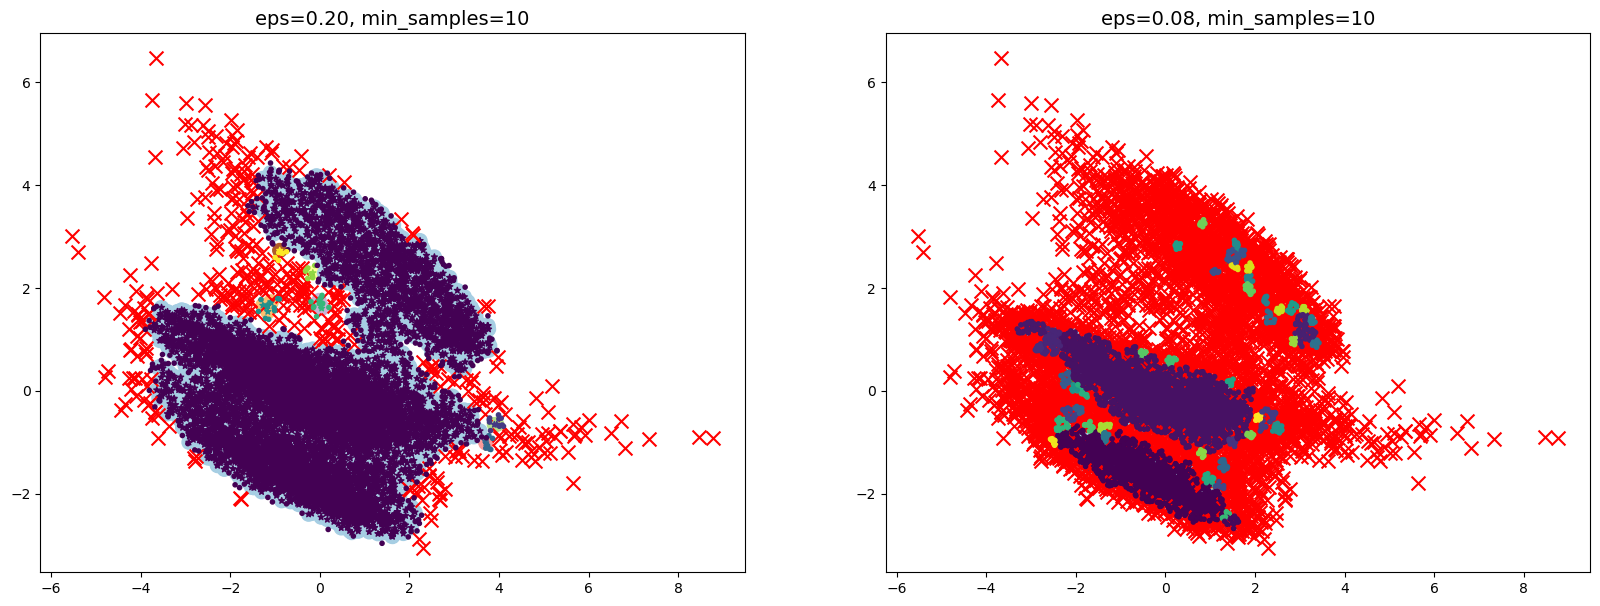

In [18]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
plot_dbscan(dbscan, sam_2f_pca, size=100)

plt.subplot(122)
plot_dbscan(dbscan_2, sam_2f_pca, size=100)

plt.show()


The performance of the DBSCAN algorithm is very poor, indicating that a better feature analysis is needed to select more suitable columns from the original dataset.

## GNN

In [19]:
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

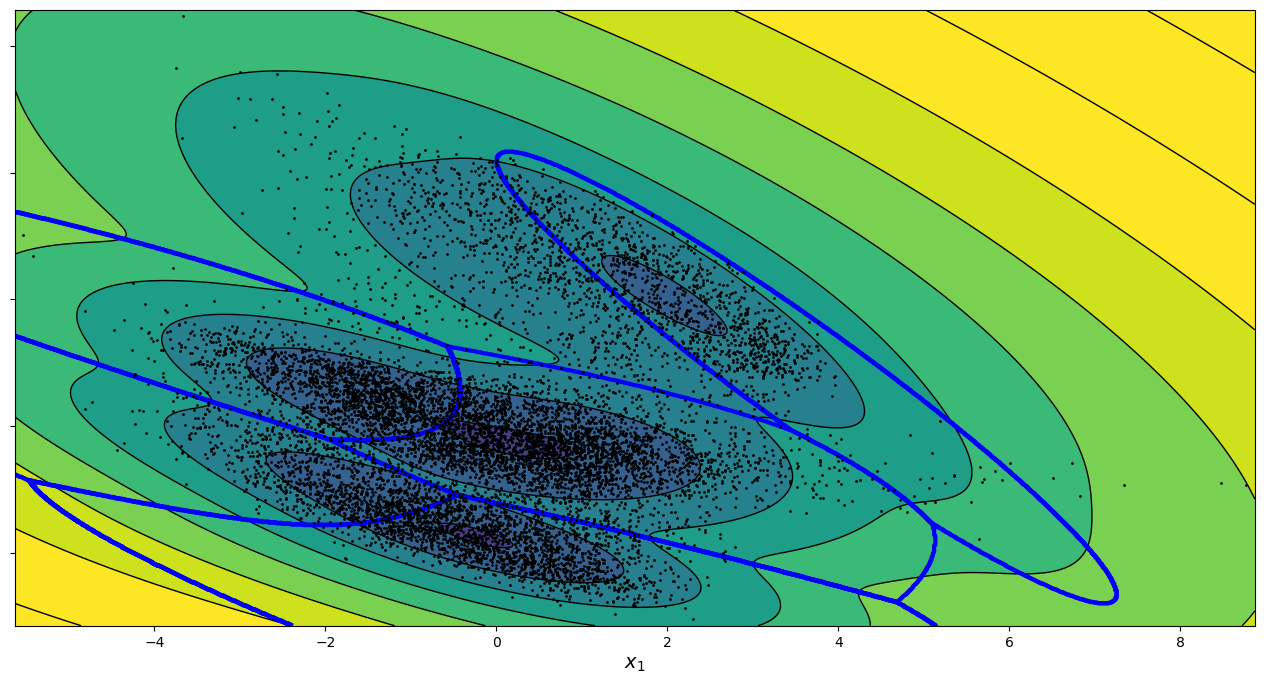

In [20]:
gm = GaussianMixture(n_components=6, n_init=10, random_state=42)
gm.fit(sam_2f_pca)

plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, sam_2f_pca)
plt.show()


Finally, the GNN algorithm seems to better represent the shape of our groups. However, further improvement in feature selection is necessary to enhance the algorithm's results.

## Improvment of Supervised Learning using clusterisation

In [21]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(sam_train, sam_train_lab)
print("Bez KMeans :", rf.score(sam_test, sam_test_lab))

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=100, random_state=2)),
    ("rf", RandomForestClassifier(random_state=42)),
])
pipeline.fit(sam_train, sam_train_lab)
print("Z KMeans :", pipeline.score(sam_test, sam_test_lab))

Bez KMeans : 0.9256871394638616


Z KMeans : 0.8751272480488632


In [22]:
# K Nearest Neighbores
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(sam_train, sam_train_lab)
print("Without KMeans: ", knn.score(sam_test, sam_test_lab))

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=100, random_state=42)),
    ("neighbores", KNeighborsClassifier(n_neighbors=6)),
])
pipeline.fit(sam_train, sam_train_lab)
print("Z KMeans :", pipeline.score(sam_test, sam_test_lab))

Without KMeans:  0.9012555140821175
Z KMeans : 0.8500169664065151



Unfortunately, none of the enhancement methods improved the performance of supervised learning. This is most likely due to poor feature selection processes.

Difference between KMeans, K-fold and K Nearest Neighbors:

KMeans is an unsupervised clustering algorithm that groups data points into k number of clusters.
K-fold is a cross-validation technique for evaluating model performance by dividing the data into k number of subsets. 
K Nearest Neighbors (KNN) is a supervised learning algorithm for classification and regression that predicts final outcome based on its k-nearest neighbors.

For all these methods, the number of k should be specified based on prior knowledge, validation, or experience.